In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import scipy.io as sio
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

%matplotlib notebook

# Arm position experiment, all subjects

In [5]:
# location of all offline data
dataDir = './emg_mat/offline/'

baseExperiment = 1
newExperiment = 3

holdStart = 70
holdEnd = 149

numIter = 1

numSVM = np.zeros((5,numIter))
accSVM = np.zeros((5,numIter))
# for s in range(5):
for s in [1]:
    subject = s + 1
    print('Running Subject ' + str(subject))
    filename = dataDir + 'S' + str(subject) + 'E' + str(baseExperiment) + '.mat'
    base = sio.loadmat(filename)['emgHD']
    filename = dataDir + 'S' + str(subject) + 'E' + str(newExperiment) + '.mat'
    new = sio.loadmat(filename)['emgHD']
    
    numGest, numTrial = base.shape
    numCh = base[0,0][2].shape[1]
    numEx = holdEnd - holdStart + 1
    
    for n in range(numIter):
        trainFeat = np.empty((numCh*5,0))
        trainLabels = np.empty(0)
        testFeat = np.empty((numCh*5,0))
        testLabels = np.empty(0)
        
        svs = pd.DataFrame()
        testTrials = np.random.randint(0,numTrial,numGest)
        for t in range(numTrial):
            for g in range(numGest):
                trial = base[g,t]
                if t == testTrials[g]:
                    feat = np.empty((0,numEx))
                    for i in range(5):
                        feat = np.concatenate((feat,trial[2][(holdStart+i):(holdEnd+i+1),:].T),axis=0)
                    testFeat = np.concatenate((testFeat,feat),axis=1)
                    testLabels = np.concatenate((testLabels,g*np.ones(numEx)))
                else:
                    feat = np.empty((0,numEx))
                    for i in range(5):
                        feat = np.concatenate((feat,trial[2][(holdStart+i):(holdEnd+i+1),:].T),axis=0)
                    trainFeat = np.concatenate((trainFeat,feat),axis=1)
                    trainLabels = np.concatenate((trainLabels,g*np.ones(numEx)))
                    
        testTrials = np.random.randint(0,numTrial,numGest)
        for t in range(numTrial):
            for g in range(numGest):
                trial = new[g,t]
                if t == testTrials[g]:
                    feat = np.empty((0,numEx))
                    for i in range(5):
                        feat = np.concatenate((feat,trial[2][(holdStart+i):(holdEnd+i+1),:].T),axis=0)
                    testFeat = np.concatenate((testFeat,feat),axis=1)
                    testLabels = np.concatenate((testLabels,g*np.ones(numEx)))
                else:
                    feat = np.empty((0,numEx))
                    for i in range(5):
                        feat = np.concatenate((feat,trial[2][(holdStart+i):(holdEnd+i+1),:].T),axis=0)
                    trainFeat = np.concatenate((trainFeat,feat),axis=1)
                    trainLabels = np.concatenate((trainLabels,g*np.ones(numEx)))

        # arrange data into a pandas dataframe for interface with sklearn
        feat_cols = ['feature' + str(i) for i in range(trainFeat.shape[0])]
        trainData = pd.DataFrame(trainFeat.T,columns=feat_cols)
        trainData['gesture'] = trainLabels
        testData = pd.DataFrame(testFeat.T,columns=feat_cols)
        testData['gesture'] = testLabels

        # collect feature and target variables
        Xtrain = trainData.iloc[:,0:numCh*5]
        ytrain = trainData.iloc[:,numCh*5]
        
        Xtest = testData.iloc[:,0:numCh*5]
        ytest = testData.iloc[:,numCh*5]
        
        Xtrain = np.round(Xtrain.clip(0,64))
        Xtest = np.round(Xtest.clip(0,64))
        
#         # batch train and test SVM model
#         clf = svm.SVC(decision_function_shape='ovo',kernel='linear',C=10)
#         clf.fit(Xtrain,ytrain)
#         yhat = clf.predict(Xtest)
#         accSVM[s,n] = accuracy_score(yhat,ytest)
#         numSVM[s,n] = len(clf.support_)
#         acc = accSVM[s,np.nonzero(accSVM[s,:])].mean()
#         num = numSVM[s,np.nonzero(numSVM[s,:])].mean()
#         print('\t Iteration %d: Accuracy = %f, # SV = %d\r'%(n+1,acc,num),end="")

        clf = svm.SVC(decision_function_shape='ovo',kernel='linear',C=1000)
        clf.fit(Xtest,ytest)
        yhat = clf.predict(Xtrain)
        accSVM[s,n] = accuracy_score(yhat,ytrain)
        numSVM[s,n] = len(clf.support_)
        acc = accSVM[s,np.nonzero(accSVM[s,:])].mean()
        num = numSVM[s,np.nonzero(numSVM[s,:])].mean()
        print('\t Iteration %d: Accuracy = %f, # SV = %d\r'%(n+1,acc,num),end="")
    print('')
        
#         # batch train and test LDA model
#         clf = LinearDiscriminantAnalysis()
#         clf.fit(Xtrain,ytrain)
#         yhat = clf.predict(Xtest)
#         print('\t Iteration %d: Accuracy = %f\r'%(n+1,accuracy_score(yhat,ytest)),end="")
# #         accSVM[s,n] = accuracy_score(yhat,ytest)
# #         numSVM[s,n] = len(clf.support_)
#         print('')

Running Subject 2
	 Iteration 1: Accuracy = 0.985337, # SV = 488


<IPython.core.display.Javascript object>


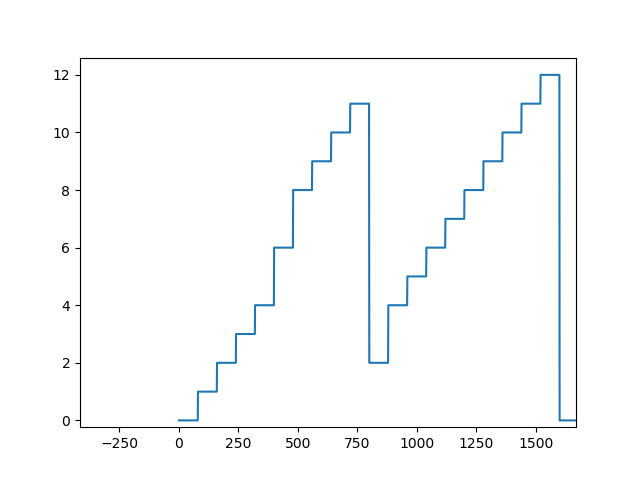

In [7]:
trainData['gesture'].plot()

In [4]:
test

""
